**Лабораторная работа №1**

**Градиентный спуск и его модификации**

Студент: Пешков М.Ю.
Группа: М8О-109М-23

**Задание**:



*   Выбрать тестовые функции оптимизации (2 шт)
*   Запрограммировать реализацию классического градиентного спуска
*   Запрограммировать пайлайн тестирования алгоритма оптимизации
 *   Визуализации функции и точки оптимума
 *   Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
 *   Визуализации точки найденного решения (можно добавить анимацию на плюс балл)


*   Запрограммировать метод вычисления градиента
 *   Передача функции градиента от пользователя
 *   Символьное вычисление градиента (например с помощью sympy) (на доп балл)
 *   Численная аппроксимация градиента (на доп балл)
*   Запрограммировать одну моментную модификацию и протестировать ее
*   Запрограммировать одну адаптивную модификацию и протестировать ее
*   Запрограммировать метод эволюции темпа обучения и/или метод выбора начального приближения и протестировать их











In [44]:
import numpy as np
from numpy import linalg as la
from typing import Tuple, Mapping
from matplotlib import pyplot as plt
import math

**Визуализация метода оптимизации**

In [45]:
def draw_op_result(f, grad_history):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection = '3d')
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    x_grid, y_grid = np.meshgrid(x,y)
    z_grid = f.func(x_grid, y_grid)

    glob_minimum = f.glob_min()
    ax.plot_surface(x_grid, y_grid, z_grid, cmap = 'viridis', alpha=0.5)
    ax.plot(grad_history[:, 0], grad_history[:, 1], grad_history[:, 2], c='black', label = 'Градиентный спуск', alpha = 0.7)
    ax.scatter3D(grad_history[0, 0], grad_history[0, 1], grad_history[0, 2], s=100, c="black", ec='black', marker = 'o', label="Начальная точка")
    ax.scatter3D(grad_history[-1, 0], grad_history[-1, 1], grad_history[-1, 2], s=150, c="white", ec='black', marker = 'o', label="Найденный минимум",  alpha = 1)
    ax.scatter3D(glob_minimum[0], glob_minimum[1], glob_minimum[2], s=200, c="Blue", ec='Blue', marker = 'o', label="Глобальный минимум", alpha = 0.7)

**Тестовые функции**

**Функция Матьяса**

Визуализация функции Матьяса

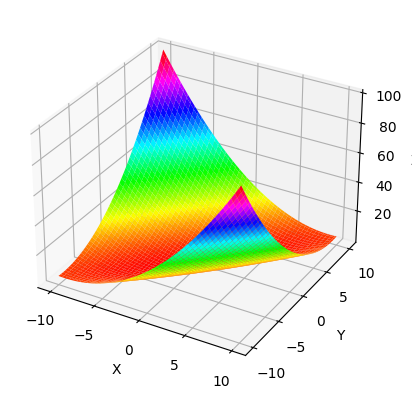

In [46]:
def matyas(x, y):
    return 0.26 * (x**2 + y**2) - 0.48 * x * y

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
Z = matyas(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='hsv')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [47]:
class Matyas:

  @staticmethod
  def func(x,y):
    return 0.26*(x*x +y*y)-0.48*x*y

  @staticmethod
  def dx(x,y):
    return 0.52*x - 0.48 * y

  @staticmethod
  def dy(x,y):
    return 0.52*y - 0.48 * x

  @staticmethod
  def glob_min():
      return np.array([0., 0., 0.])


**Функция Растригина**

Визуализация функции Ратсригина

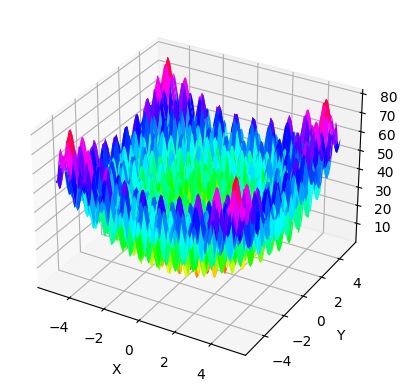

In [48]:
def rastrigin(x, y):
    return 20 + x**2 - 10 * np.cos(2 * np.pi * x) + y**2 - 10 * np.cos(2 * np.pi * y)

x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)

X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='hsv')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [49]:
class Rastrigin:

  @staticmethod
  def func(x,y):
    return 20 + x**2 - 10 * np.cos(2 * np.pi * x) + y**2 - 10 * np.cos(2 * np.pi * y)

  @staticmethod
  def dx(x,y):
    return 2 * x + 20 * np.pi * np.sin(2 * np.pi * x)

  @staticmethod
  def dy(x,y):
    return 2 * y + 20 * np.pi * np.sin(2 * np.pi * y)

  @staticmethod
  def glob_min():
      return np.array([0. ,0. ,0.])

**Классический градиентный спуск**

In [50]:
def GD_classic( f, x0, y0, lr, max_iterations, delta = 0.001):

#f - функция оптимизации
#dx - производная по x
#dy - производная по y
#x0,y0 - начальная точка
#lr - learning rate(0.1)
#max_iterations - максимальное количество итераций)

    grad_history = [np.array([x0, y0, f.func(x0,y0)])]
    i = 0
    while (i < max_iterations and la.norm(grad_history[-1] - f.glob_min()) > delta):
        i += 1
        new_x = x0 - lr * f.dx(x0,y0)
        new_y = y0 - lr * f.dy(x0,y0)
        x0 = new_x
        y0 = new_y
        grad_history.append(np.array([x0, y0, f.func(x0, y0)]))

    return np.array(grad_history)

Функция Матьяса

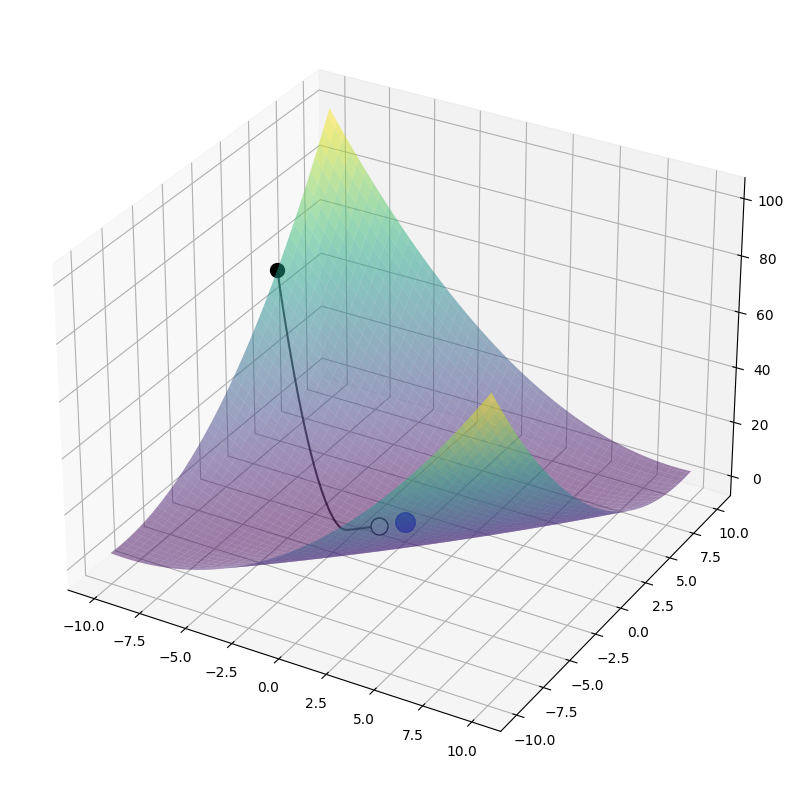

In [51]:
x , y = -10, 5
grad_history = GD_classic(Matyas, x, y, 0.1, 250)
draw_op_result(Matyas, grad_history)

np.set_printoptions(formatter={'float_kind':"{:.2f}".format})
print(f"Начальная точка:\t\t\t{grad_history[0]}")
np.set_printoptions(formatter={'float_kind':"{:.2e}".format})
print(f"Найденный минимум:\t\t\t{grad_history[-1]}")
print(f"Глобальный минимум:\t\t\t{Matyas.glob_min()}")
print(f"Кол-во итераций:\t\t\t{len(grad_history)}")
np.set_printoptions(formatter={'float_kind':"{:.2e}".format})
print(f"Погрешность найденного решения:\t\t{abs(Matyas.glob_min()[2] - grad_history[-1])[2]}")
fig.text(0.9, 0.1, s=f"Кол-во итераций: {len(grad_history)}", horizontalalignment="right", fontsize = 12)

Функция Растригина

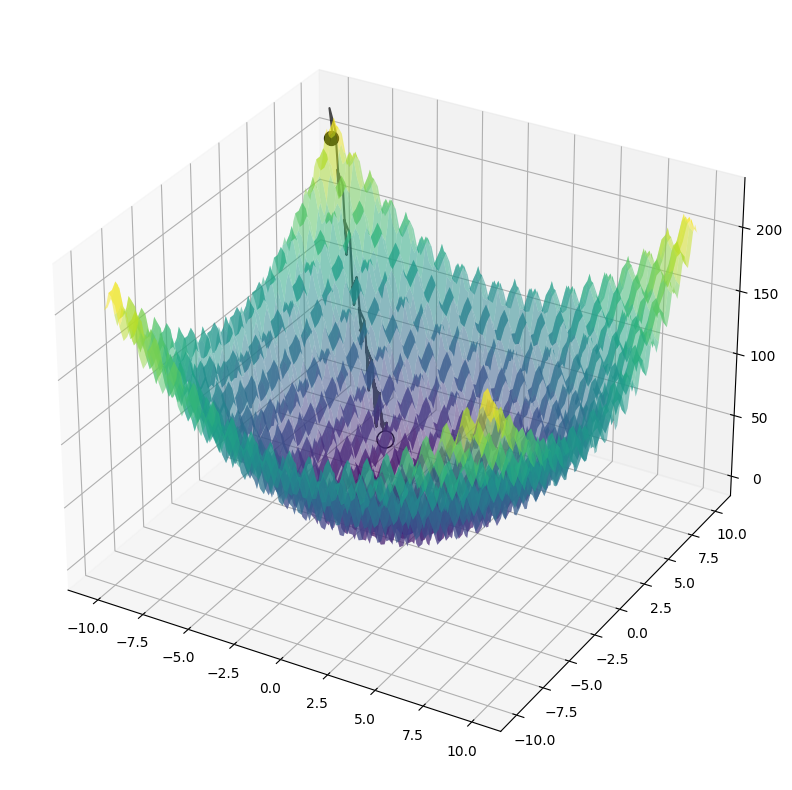

In [53]:
x , y = -10, 10
grad_history = GD_classic(Rastrigin, x, y, 0.01, 200)
draw_op_result(Rastrigin, grad_history)

np.set_printoptions(formatter={'float_kind':"{:.2f}".format})
print(f"Начальная точка:\t\t\t{grad_history[0]}")
np.set_printoptions(formatter={'float_kind':"{:.2e}".format})
print(f"Найденный минимум:\t\t\t{grad_history[-1]}")
print(f"Глобальный минимум:\t\t\t{Rastrigin.glob_min()}")
print(f"Кол-во итераций:\t\t\t{len(grad_history)}")
np.set_printoptions(formatter={'float_kind':"{:.2e}".format})
print(f"Погрешность найденного решения:\t\t{abs(Rastrigin.glob_min()[2] - grad_history[-1])[2]}")
fig.text(0.9, 0.1, s=f"Кол-во итераций: {len(grad_history)}", horizontalalignment="right", fontsize = 12)

**Моментный градиентный спуск**

In [8]:
def GD_moment( f, x0, y0, lr, max_iterations):

#f - функция оптимизации
#x0,y0 - начальная точка
#lr - learning rate(0.1)
#max_iterations - максимальное количество итераций)

    grad_history = [np.array([x0, y0, f.func(x0,y0)])]
    delta = 0.001
    gamma = 0.7
    i = 0
    x_prev = x0
    y_prev = y0
    while (i < max_iterations and la.norm(grad_history[-1] - f.glob_min()) > delta):
        new_x = gamma * x0 - lr * f.dx(x0,y0)
        new_y = gamma * y0 - lr * f.dy(x0,y0)
        x_prev = x0
        y_prev = y0
        x0 = new_x
        y0 = new_y
        grad_history.append(np.array([x0, y0, f.func(x0, y0)]))
        i += 1

    return np.array(grad_history)

Функция Матьяса

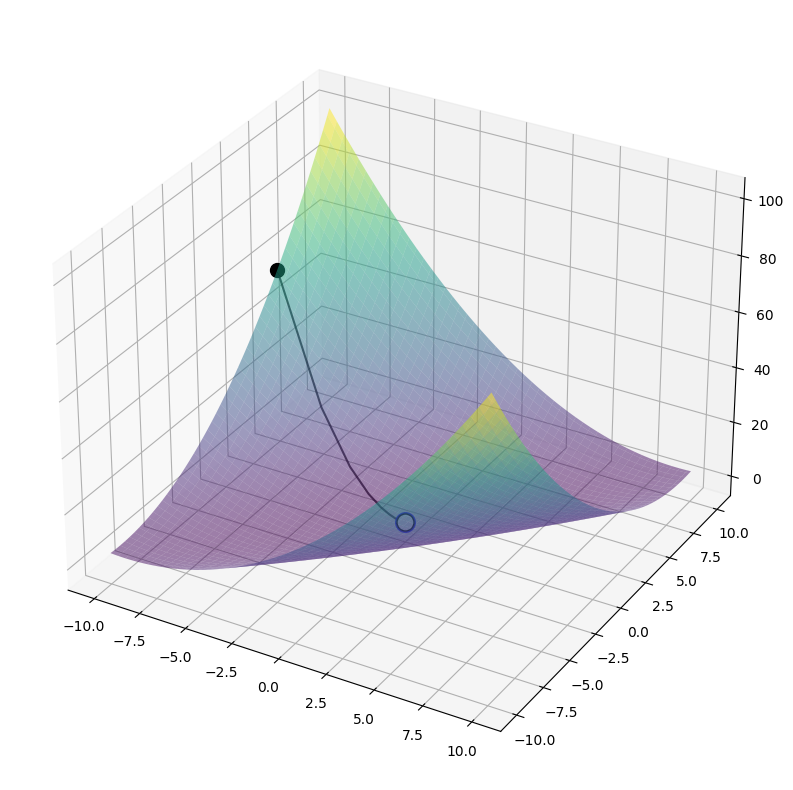

In [39]:
x , y = -10, 5
grad_history = GD_moment(Matyas, x, y, 0.1, 250)
draw_op_result(Matyas, grad_history)

np.set_printoptions(formatter={'float_kind':"{:.2f}".format})
print(f"Начальная точка:\t\t\t{grad_history[0]}")
np.set_printoptions(formatter={'float_kind':"{:.2e}".format})
print(f"Найденный минимум:\t\t\t{grad_history[-1]}")
print(f"Глобальный минимум:\t\t\t{Matyas.glob_min()}")
print(f"Кол-во итераций:\t\t\t{len(grad_history)}")
np.set_printoptions(formatter={'float_kind':"{:.2e}".format})
print(f"Погрешность найденного решения:\t\t{abs(Matyas.glob_min()[2] - grad_history[-1])[2]}")
fig.text(0.9, 0.1, s=f"Кол-во итераций: {len(grad_history)}", horizontalalignment="right", fontsize = 12)

Функция Растригина

Начальная точка:			[-10.00 10.00 200.00]
Найденный минимум:			[-1.08e-01 1.08e-01 4.43e+00]
Глобальный минимум:			[0 0 0]
Кол-во итераций:			101
Погрешность найденного решения:		4.434402161437661


Text(0.9, 0.1, 'Кол-во итераций: 101')

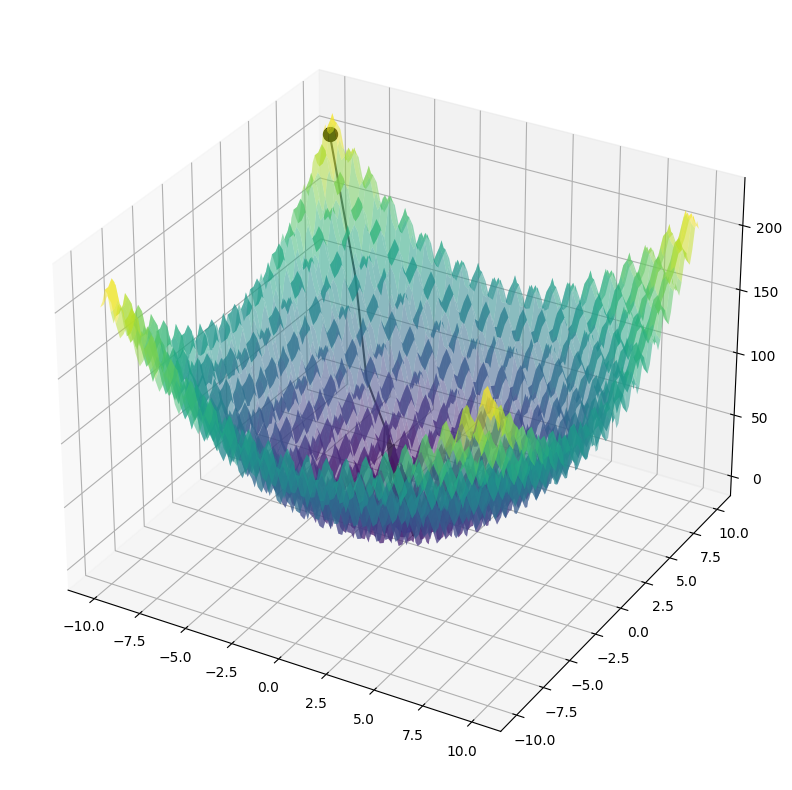

In [55]:
x , y = -10, 10
grad_history = GD_moment(Rastrigin, x, y, 0.02, 100)
draw_op_result(Rastrigin, grad_history)

np.set_printoptions(formatter={'float_kind':"{:.2f}".format})
print(f"Начальная точка:\t\t\t{grad_history[0]}")
np.set_printoptions(formatter={'float_kind':"{:.2e}".format})
print(f"Найденный минимум:\t\t\t{grad_history[-1]}")
print(f"Глобальный минимум:\t\t\t{Rastrigin.glob_min()}")
print(f"Кол-во итераций:\t\t\t{len(grad_history)}")
np.set_printoptions(formatter={'float_kind':"{:.2e}".format})
print(f"Погрешность найденного решения:\t\t{abs(Rastrigin.glob_min()[2] - grad_history[-1])[2]}")
fig.text(0.9, 0.1, s=f"Кол-во итераций: {len(grad_history)}", horizontalalignment="right", fontsize = 12)

**Адаптивный градиентный спуск**

In [10]:
def GD_ad( f, x0, y0, lr, max_iterations, b1 = 0.6, b2 = 0.999, e = 10e-8, delta = 0.001):


# f - функция оптимизации
# x0,y0 - начальная точка
# lr - learning rate(0.1)
# max_iterations - максимальное количество итераций)
# b1 - коэф. beta1
# b2 - коэф. beta2

    grad_history = [np.array([x0, y0, f.func(x0,y0)])]
    momentum_1 = np.array([0,0])
    momentum_2 = np.array([0,0])
    i = 0
    while (i < max_iterations and la.norm(grad_history[-1] - f.glob_min()) > delta):
        # momentum_1 хранит информацию о градиентах
        momentum_1 = b1 * momentum_1 + (1 - b1) * np.array([f.dx(x0,y0), f.dy(x0, y0)])
        # momentum_2 хранит информацию о квадратах градиентов
        momentum_2 = b2 * momentum_2 + (1 - b2) * np.array([f.dx(x0,y0), f.dy(x0, y0)]) **2
        x0 = x0 - lr * momentum_1[0] / (np.sqrt(momentum_2[0]) + e)
        y0 = y0 - lr * momentum_1[1] / (np.sqrt(momentum_2[1]) + e)
        grad_history.append(np.array([x0, y0, f.func(x0, y0)]))
        i += 1

    return np.array(grad_history)

Функция Матьяса

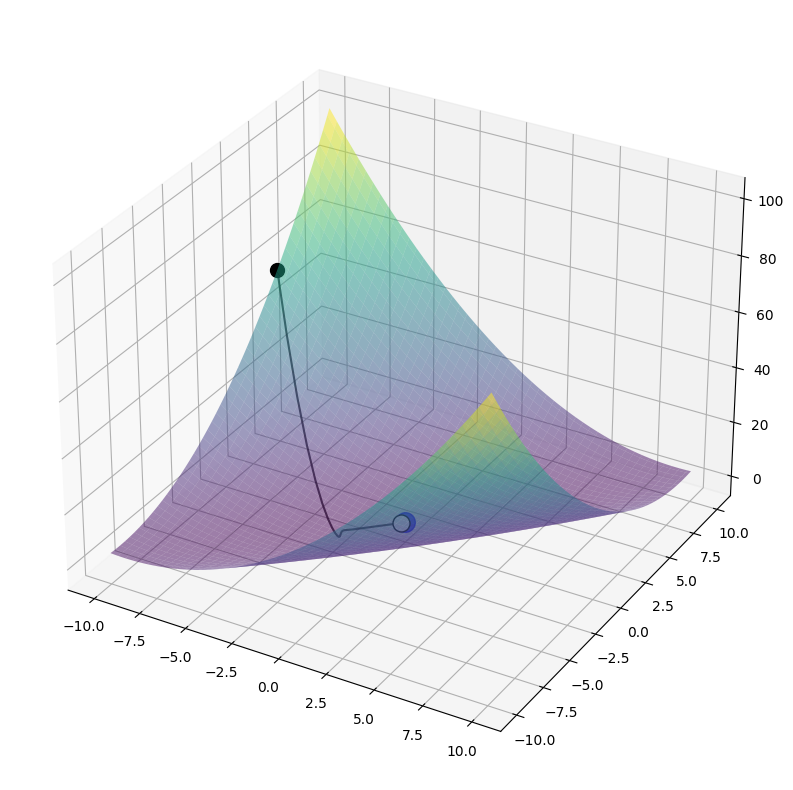

In [41]:
x , y = -10, 5
grad_history = GD_ad(Matyas, x, y, 0.1, 250)
draw_op_result(Matyas, grad_history)

np.set_printoptions(formatter={'float_kind':"{:.2f}".format})
print(f"Начальная точка:\t\t\t{grad_history[0]}")
np.set_printoptions(formatter={'float_kind':"{:.2e}".format})
print(f"Найденный минимум:\t\t\t{grad_history[-1]}")
print(f"Глобальный минимум:\t\t\t{Matyas.glob_min()}")
print(f"Кол-во итераций:\t\t\t{len(grad_history)}")
np.set_printoptions(formatter={'float_kind':"{:.2e}".format})
print(f"Погрешность найденного решения:\t\t{abs(Matyas.glob_min()[2] - grad_history[-1])[2]}")
fig.text(0.9, 0.1, s=f"Кол-во итераций: {len(grad_history)}", horizontalalignment="right", fontsize = 12)

Функция Растригина

Начальная точка:			[-10.00 5.00 125.00]
Найденный минимум:			[-2.08e+00 1.92e+00 1.05e+01]
Глобальный минимум:			[0 0 0]
Кол-во итераций:			101
Погрешность найденного решения:		10.50580642876104


Text(0.9, 0.1, 'Кол-во итераций: 101')

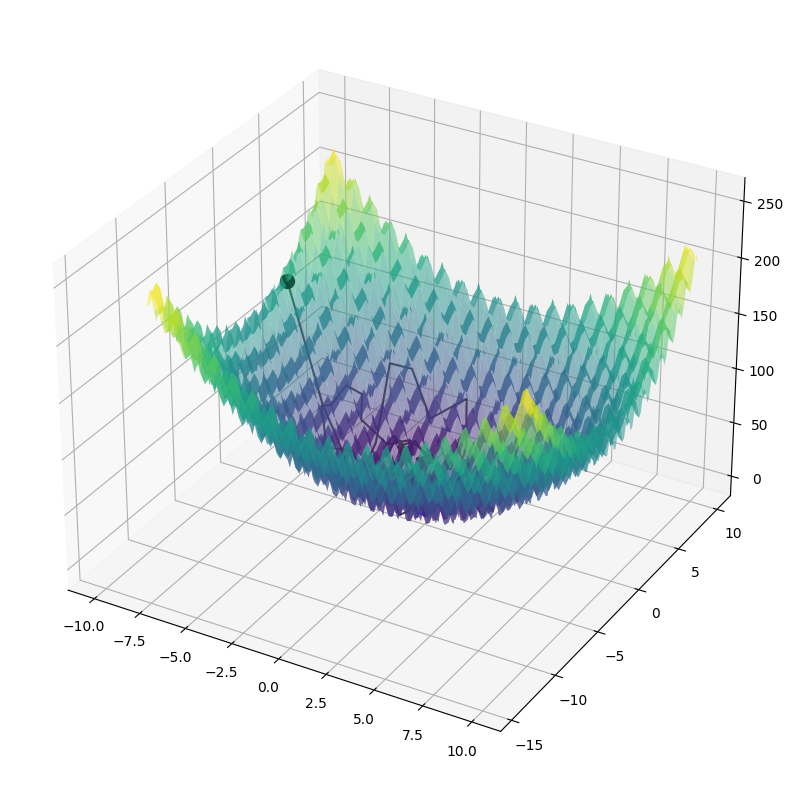

In [57]:
x , y = -10, 5
grad_history = GD_ad(Rastrigin, x, y, 0.3, 100)
draw_op_result(Rastrigin, grad_history)

np.set_printoptions(formatter={'float_kind':"{:.2f}".format})
print(f"Начальная точка:\t\t\t{grad_history[0]}")
np.set_printoptions(formatter={'float_kind':"{:.2e}".format})
print(f"Найденный минимум:\t\t\t{grad_history[-1]}")
print(f"Глобальный минимум:\t\t\t{Rastrigin.glob_min()}")
print(f"Кол-во итераций:\t\t\t{len(grad_history)}")
np.set_printoptions(formatter={'float_kind':"{:.2e}".format})
print(f"Погрешность найденного решения:\t\t{abs(Rastrigin.glob_min()[2] - grad_history[-1])[2]}")
fig.text(0.9, 0.1, s=f"Кол-во итераций: {len(grad_history)}", horizontalalignment="right", fontsize = 12)